In [1]:
# Does not need to be executed if
# ~/.ipython/profile_default/ipython_config.py
# exists and contains:
# get_config().InteractiveShell.ast_node_interactivity = 'all'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from random import random
from itertools import count
from argparse import ArgumentParser
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

The game of life offers a simplistic model of living cells coming to life, surviving, and dying. It is played on a 2-dimensional grid. We first assume that the grid is bounded. To start with, it supports an initial population distribution. Every living cell has at most 8 neighbouring living cells (positioned horizontally, vertically, and diagonally). The population evolves in stages. At every stage:

* living cells surrounded by exactly 2 or 3 living cells survive; with less than 2, they die of loneliness, and with more than 3, they die of overcrowding;
* empty positions surrounded by exactly 3 neighbouring living cells are nice and cosy, and see a cell come to life.

For instance, consider a grid of size at least 5 x 5 whose center is initially populated as follows:

$\begin{array}{cccccc}
      &       &       &       &       \\
      & \star & \star & \star &       \\
      & \star &       & \star &       \\
      & \star & \star & \star &       \\
      &       &       &       &
\end{array}$

For the next three stages, the population distribution will become first

$\begin{array}{cccccc}
      &       & \star &       &       \\
      & \star &       & \star &       \\
\star &       &       &       & \star \\
      & \star &       & \star &       \\
      &       & \star &       &
\end{array}$

and then

$\begin{array}{cccccc}
      &       & \star &       &       \\
      & \star & \star & \star &       \\
\star & \star &       & \star & \star \\
      & \star & \star & \star &       \\
      &       & \star &       &
\end{array}$

and then

$\begin{array}{cccccc}
      & \star & \star & \star &       \\
\star &       &       &       & \star \\
\star &       &       &       & \star \\
\star &       &       &       & \star \\
      & \star & \star & \star &       \\
\end{array}$

Let us work with a grid of size 10 x 10. First, let us create a grid for a lifeless world, filled with nothing but 0's. Let us also write a function to display the contents of the grid:

In [3]:
size = 10
grid = [[0]*size]*size

def display_grid():
    for row in grid:
        print(*row)
        
display_grid()

0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0


We want the grid to store some 1's that represent living cells. We fix an expected density of living cells, say 30%, and 100 times, generate a number between 0 and 1, for a living cell if the generated number is less than 0.3, and for an empty position otherwise. Let us first initialise `grid` to a list of 10 lists of 10 `0`'s, before each member of `grid`'s 10 members is given a chance of 0.3 to be changed to a `1`:

In [4]:
density = 0.3
grid = [[0]*size for _ in range(size)]
for i in range(size):
    for j in range(size):
        if random() < density:
            grid[i][j] = 1

display_grid()

0 0 1 0 1 0 1 0 0 0
0 0 1 0 1 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0
1 0 1 0 0 0 1 0 0 0
1 0 0 0 0 1 0 0 0 0
1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 1 0 0 0 0
1 0 0 0 0 1 0 0 0 0
0 0 0 0 0 1 1 0 0 1
0 0 0 0 0 1 0 0 0 1


This could have been more concisely achieved as follows:

In [5]:
grid = [[None] * size for _ in range(size)]
for i in range(size):
    for j in range(size):
        grid[i][j] = int(random() < density)

display_grid()

0 0 1 0 0 1 0 1 0 0
0 0 0 0 0 1 0 0 1 0
0 1 1 0 0 0 0 1 0 0
0 0 1 0 0 1 1 0 0 1
1 0 1 1 0 0 1 0 0 0
1 0 1 0 0 1 1 0 0 1
0 1 0 0 1 1 0 0 1 0
0 0 0 1 0 0 0 0 0 1
0 0 1 0 0 0 0 0 0 0
0 0 0 1 0 1 1 0 0 1


But the following code fragment would not be appropriate:

In [6]:
grid = [[None] * size] * size
for i in range(size):
    for j in range(size):
        grid[i][j] = int(random() < density)

display_grid()

1 1 0 0 0 1 0 0 0 0
1 1 0 0 0 1 0 0 0 0
1 1 0 0 0 1 0 0 0 0
1 1 0 0 0 1 0 0 0 0
1 1 0 0 0 1 0 0 0 0
1 1 0 0 0 1 0 0 0 0
1 1 0 0 0 1 0 0 0 0
1 1 0 0 0 1 0 0 0 0
1 1 0 0 0 1 0 0 0 0
1 1 0 0 0 1 0 0 0 0


Indeed,

* `0` denotes the representation in memory of a structure $Z$ that models the integer 0;
* `[0] * size` denotes the representation in memory of a list $L$ consisting of 10 times that representation in memory of $Z$;
* `[[0] * size] * size` denotes the representation in memory of a list $L'$ consisting of 10 times that representation in memory of $L$.

A statement of the form `grid[i][j]` then lets one of the 10 members of $L$ change from a representation in memory of $Z$ to a representation in memory of a structure $U$ that models the integer 1. This change in $L$ is reflected in the 10 denotations of $L$ in $L'$. The following code fragment illustrates further:

In [7]:
L = [[0] * 3] * 2; L
L[0][1] = 10; L
L[1][2] = 20; L

L = [[0 for i in range(3)] for i in range(3)]
L
L[0][1] = 30 ;L


[[0, 0, 0], [0, 0, 0]]

[[0, 10, 0], [0, 10, 0]]

[[0, 10, 20], [0, 10, 20]]

[[0, 0, 0], [0, 0, 0], [0, 0, 0]]

[[0, 30, 0], [0, 0, 0], [0, 0, 0]]

That being said, using two list comprehensions is the best way to define a list of lists of randomly generated `0`'s and `1`'s following the desired distribution:

In [8]:
density = 0.3
grid = [[int(random() < density) for _ in range(size)] for _ in range(size)]

display_grid()

0 0 0 0 0 0 1 1 0 0
0 0 1 1 0 0 0 0 0 0
0 0 0 1 0 0 0 0 0 0
1 1 0 0 1 1 1 0 0 0
0 1 1 0 1 0 0 1 0 0
0 0 0 0 0 0 1 0 1 0
0 1 0 0 0 0 0 0 0 0
1 1 0 0 0 0 1 0 0 0
0 1 0 0 1 0 0 1 0 0
0 1 0 1 0 0 0 0 0 0


Let us write an alternative to `display_grid()` for a nicer output, black and white squares rather than 1's and 0's:

In [10]:
def display_population():
    squares = {0: '\u2b1c', 1: '\u2b1b'}
    for row in grid:
         print(''.join(f'{squares[e]}'for e in row) )
        
           
        

display_population()

⬜⬜⬜⬜⬜⬜⬛⬛⬜⬜
⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬜⬜⬜
⬛⬛⬜⬜⬛⬛⬛⬜⬜⬜
⬜⬛⬛⬜⬛⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬛⬜⬛⬜
⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜
⬛⬛⬜⬜⬜⬜⬛⬜⬜⬜
⬜⬛⬜⬜⬛⬜⬜⬛⬜⬜
⬜⬛⬜⬛⬜⬜⬜⬜⬜⬜


To compute the next stage of living cells distribution, it suffices to define a new grid meant to represent, at the intersection of row $i$ and column $j$, a living cell if there is currently a living cell at that location and there are exactly 2 neighbouring living cells, or if there are exactly 3 neighbouring living cells (either there is a living cell at that location and it survives, or there is no living cell at that location and one appears). Eventually, we make the original grid denote the new grid (necessitating the `global grid` statement). When computing neighbours, we have to pay attention to positions that have only 5 or 3 neighbours rather than 8 because they are along one of the grid's boundaries or at one of grid's corners:

In [11]:
def next_generation():
    global grid
    new_grid = [[None] * size for _ in range(size)]
    for i in range(size):
        for j in range(size):
            nb_of_neighbours = 0
            # Above left
            if i and j and grid[i - 1][j - 1]:
                nb_of_neighbours += 1
            # Above
            if i and grid[i - 1][j]:
                nb_of_neighbours += 1
            # Above right
            if i and j < size - 1 and grid[i - 1][j + 1]:
                nb_of_neighbours += 1
            # Left
            if j and grid[i][j - 1]:
                nb_of_neighbours += 1
            # Right
            if j < size - 1 and grid[i][j + 1]:
                nb_of_neighbours += 1
            # Below left
            if i < size - 1 and j and grid[i + 1][j - 1]:
                nb_of_neighbours += 1
            # Below
            if i < size - 1 and grid[i + 1][j]:
                nb_of_neighbours += 1
            # Below right
            if i < size - 1 and j < size - 1 and grid[i + 1][j + 1]:
                nb_of_neighbours += 1
            new_grid[i][j] = int(grid[i][j] and nb_of_neighbours == 2
                                 or nb_of_neighbours == 3
                                )
    grid = new_grid
    
next_generation()
display_population()
print()

next_generation()
display_population()


⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜
⬜⬛⬜⬛⬜⬛⬜⬜⬜⬜
⬛⬛⬜⬜⬛⬛⬛⬜⬜⬜
⬛⬛⬛⬛⬛⬜⬜⬛⬜⬜
⬜⬛⬛⬜⬜⬜⬜⬛⬜⬜
⬛⬛⬜⬜⬜⬜⬜⬛⬜⬜
⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜
⬜⬛⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜
⬛⬛⬜⬛⬜⬛⬛⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬛⬜⬜⬜
⬜⬜⬜⬜⬛⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜
⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


The code is awkward because of the care exercised for the boundary positions. We can instead work with a grid of size 12 x 12, having in mind a surrounding "frame" (first row, last row, first column, last column), where no cell will ever come to life, but that provides exactly 8 neighbours to all positions within the frame. The cost of using a bit of extra space is more than compensated by the gain in elegance, and to a lesser extent, efficiency:

In [12]:
framed_grid = [[0] * (size + 2) for _ in range(size + 2)]
for i in range(1, size + 1):
    for j in range(1, size + 1):
        framed_grid[i][j] = int(random() < density)

def display_population_within_frame():
    squares = {0: '\u2b1c', 1: '\u2b1b'}
    for i in range(1, size + 1):
        print(''.join(f'{squares[framed_grid[i][j]]}'
                              for j in range(1, size + 1)
                     )
             )
        
def next_generation_within_frame():
    global framed_grid
    new_framed_grid = [[0] * (size + 2) for _ in range(size + 2)]
    for i in range(1, size + 1):
        for j in range(1, size + 1):
            nb_of_neighbours = sum((framed_grid[i - 1][j - 1],
                                    framed_grid[i - 1][j],
                                    framed_grid[i - 1][j + 1],
                                    framed_grid[i][j - 1],
                                    framed_grid[i][j + 1],
                                    framed_grid[i + 1][j - 1],
                                    framed_grid[i + 1][j],
                                    framed_grid[i + 1][j + 1]
                                   )
                                  )
            new_framed_grid[i][j] = int(framed_grid[i][j]
                                        and nb_of_neighbours == 2
                                        or nb_of_neighbours == 3
                                       )
    framed_grid = new_framed_grid

display_population_within_frame()
print()

next_generation_within_frame()
display_population_within_frame()
print()

next_generation_within_frame()
display_population_within_frame()

⬜⬛⬜⬛⬛⬛⬜⬛⬜⬛
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬛⬛⬜⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬜⬜⬛
⬜⬛⬛⬜⬜⬜⬛⬛⬛⬜
⬜⬜⬛⬜⬛⬜⬛⬛⬜⬜
⬛⬜⬛⬛⬛⬜⬜⬜⬛⬜
⬜⬛⬜⬜⬛⬛⬜⬛⬜⬛
⬛⬜⬛⬜⬜⬛⬛⬜⬛⬜

⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜
⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜
⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬛⬛⬛⬜⬜⬜⬜⬛⬜
⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬛⬜
⬛⬜⬜⬜⬜⬜⬜⬛⬜⬛
⬜⬛⬜⬜⬛⬛⬛⬛⬛⬜

⬜⬜⬛⬜⬛⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬛⬜⬜⬜⬜⬜
⬜⬛⬛⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬛⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬛⬛⬜⬜⬜⬜⬜⬜
⬜⬛⬜⬜⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬛⬛⬜
⬜⬛⬜⬜⬜⬛⬜⬜⬜⬛
⬜⬜⬜⬜⬜⬛⬛⬛⬛⬜


A Python list can contain all kinds of values, of all types. This flexibility comes at the cost of efficiency. When the members of a list are all of the same type, then the `numpy` module and its `array` class offer more powerful operations, that are implemented very effectively. The shape of an `array` can change to treat a sequence of data all of the same type, stored consecutively in memory, as a list, or as a list of lists, or as a list of lists of lists... The following illustrates:

In [74]:
# 1 dimension
L = np.array([0, 1, 2, 3, 4, 5, 6, 7])

# Type inferred from the values used for initialisation, size is number
# of elements, independy of shape, which represents the number of
# dimensions, and the number of elements in each dimension.
L, L.dtype, L.size, L.shape
# Viewed in 2 dimensions, in various ways.
L.reshape((1, 8))
L.reshape((8, 1))
L.reshape((2, 4))
L.reshape((4, 2))
# Viewed in 3 dimensions.
L.reshape((2, 2, 2))
L
# Changing the element of index 0 of each of the three dimensions.
L.reshape(2, 2, 2)[0, 0, 0] = 10
# L has been changed, it was all the same data viewed differently.
L

(array([0, 1, 2, 3, 4, 5, 6, 7]), dtype('int64'), 8, (8,))

array([[0, 1, 2, 3, 4, 5, 6, 7]])

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

array([0, 1, 2, 3, 4, 5, 6, 7])

array([10,  1,  2,  3,  4,  5,  6,  7])

Consistently with the fact that the shape of an `array` is only a matter of viewing in a particular way a linear sequence of data, and can change dynamically, elements or sections of an `array` will be denoted using a single pair of square brackets with in between, as many indexes or slices are there are dimensions in the current view. This syntax has been used in the last assignment of the previous code fragment. Observe that the number of slices between square brackets corresponds to the number of dimensions of the view of the extracted data:

In [75]:
L = np.array(range(16))

L
L[10]
L[8 : 13]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

10

array([ 8,  9, 10, 11, 12])

In [76]:
L = np.array(range(16)).reshape(2, 8)

L
L[1, 2]
L[1, :]
L[1 : 2, :]
L[:, 3]
L[:, 3 : 4]

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15]])

10

array([ 8,  9, 10, 11, 12, 13, 14, 15])

array([[ 8,  9, 10, 11, 12, 13, 14, 15]])

array([ 3, 11])

array([[ 3],
       [11]])

In [77]:
L = np.array(range(16)).reshape(2, 2, 4)

L
L[1, 0, 2]
L[1, 1, 1 :]
L[1, :, 1 : 3]
L[0 : 1, 0 : 1, 1 : 3]

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

10

array([13, 14, 15])

array([[ 9, 10],
       [13, 14]])

array([[[1, 2]]])

The `zeroes` function of the `numpy` module provides a convenient way to define an `array` of a given shape, with elements all initialised to 0:

In [83]:
np.zeros((2, 2))
print(np.zeros((2, 2), np.int))

array([[0., 0.],
       [0., 0.]])

[[0 0]
 [0 0]]


Assigning a given value to all members of a section of an `array` is more easily done than with Python lists. We first let `np_framed_grid` be of size (7, 7) rather than (12, 12) to more effectively illustrate the technique, explained next, used in our last implementation:

In [90]:
np_framed_grid = np.zeros((7, 7), np.int)
np_framed_grid[2 : 5, 2 : 5] = 1
np_framed_grid[3, 3] = 0

# A "framed" grid
np_framed_grid
# The "inside" of the grid, without the surrounding "frame"
np_framed_grid[1 : -1, 1 : -1]

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

array([[0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0]])

Notice the following:

* If a copy of the grid is shifted one position to the right and one position below, then every position "inside the frame" of the original grid will be aligned with a 1 or a 0 of the shifted copy depending on whether there is a neighbouring living cell to the left of and above that position.
* If a copy of the grid is shifted one position to the right, then every position "inside the frame" of the original grid will be aligned with a 1 or a 0 of the shifted copy depending on whether there is a neighbouring living cell to the left of that position.
* If a copy of the grid is shifted one position to the right and one position above, then every position "inside the frame" of the original grid will be aligned with a 1 or a 0 of the shifted copy depending on whether there is a neighbouring living cell to the left of and below that position.

The following code fragment defines three `array`s for truncated copies of the grid to align the positions of the grid "inside the frame" with their neighbouring living cells, if any, to the left and above, to the left, or to the left and below, respectively:

In [91]:
np_above_left = np_framed_grid[: -2, : -2]
np_left = np_framed_grid[1 : -1, : -2]
np_below_left = np_framed_grid[2 :, : -2]

np_above_left
np_left
np_below_left

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 1, 1]])

array([[0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0]])

array([[0, 0, 1, 1, 1],
       [0, 0, 1, 0, 1],
       [0, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

Similarly, we define two `array`s for truncated copies of the grid to align the positions of the grid "inside the frame" with their neighbouring living cells, if any, above or below, respectively:

In [92]:
np_above = np_framed_grid[: -2, 1 : -1]
np_below = np_framed_grid[2 :, 1 : -1]

np_above
np_below

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0]])

array([[0, 1, 1, 1, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 1, 1, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

Similarly, we define three `array`s for truncated copies of the grid to align the positions of the grid "inside the frame" with their neighbouring living cells, if any, to the right and above, to the right, or to the right and below, respectively:

In [93]:
np_above_right = np_framed_grid[: -2, 2 :]
np_right = np_framed_grid[1 : -1, 2 :]
np_below_right = np_framed_grid[2 :, 2 :]

np_above_right
np_right
np_below_right

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 1, 0, 0]])

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0]])

array([[1, 1, 1, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

Adding `array`s of the same shape corresponds to matrix addition. In other words, adding up the 8 `array`s just defined yields an `array` that represents the number of neighbouring living cells at any position "inside the frame":

In [94]:
np_above_left + np_left + np_below_left + np_above + np_below + np_above_right\
+ np_right + np_below_right

array([[1, 2, 3, 2, 1],
       [2, 2, 4, 2, 2],
       [3, 4, 8, 4, 3],
       [2, 2, 4, 2, 2],
       [1, 2, 3, 2, 1]])

Boolean operators can also be applied element for element to two `array`s of the same shape:

In [95]:
A = np.array((0, 0, 1, 2)).reshape(2, 2)
B = np.array((True, False, True, False)).reshape(2, 2)

A
B
np.logical_or(A, B)
np.logical_and(A, B).astype(np.int)

array([[0, 0],
       [1, 2]])

array([[ True, False],
       [ True, False]])

array([[ True, False],
       [ True,  True]])

array([[0, 0],
       [1, 0]])

So the key elements of the game of life can be alternatively implemented using `array`s as follows:

In [89]:
np_framed_grid = np.zeros((size + 2, size + 2), np.int)
for i in range(1, size - 1):
    for j in range(1, size - 1):
        np_framed_grid[i, j] = int(random() < density)

def np_next_generation_within_frame():
    global np_framed_grid
    number_of_neighbours = np.zeros((size + 2, size + 2))
    number_of_neighbours[1 : -1, 1 : -1] =\
            np_framed_grid[: -2, : -2] + np_framed_grid[: -2, 1 : -1]\
            + np_framed_grid[: -2, 2 :] + np_framed_grid[1 : -1, : -2]\
            + np_framed_grid[1 : -1, 2 :] + np_framed_grid[2 :, : -2]\
            + np_framed_grid[2 :, 1 : -1] + np_framed_grid[2 :, 2 :]
    np_framed_grid = np.logical_or(np.logical_and(np_framed_grid == 1,
                                               number_of_neighbours == 2
                                              ), number_of_neighbours == 3
                               ).astype(np.int)

display_population_within_frame()
print()

np_next_generation_within_frame()
display_population_within_frame()
print()

np_next_generation_within_frame()
display_population_within_frame()

⬜⬜⬜⬛⬜⬛⬛⬛⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜
⬜⬜⬜⬛⬛⬛⬛⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬛⬛⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜

⬜⬜⬜⬛⬜⬛⬛⬛⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜
⬜⬜⬜⬛⬛⬛⬛⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬛⬛⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜

⬜⬜⬜⬛⬜⬛⬛⬛⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬛⬜⬛⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬛⬜⬜⬜
⬜⬜⬜⬛⬛⬛⬛⬜⬜⬜
⬜⬜⬜⬛⬜⬜⬜⬛⬜⬜
⬜⬜⬜⬜⬜⬛⬜⬜⬛⬜
⬜⬜⬜⬜⬜⬛⬛⬜⬛⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬛⬜


Let us see how to create movies of population evolutions, starting from initial populations read from rle files (rle is for "run length encoded"); `gosperglidergun.rle` is an example of such a file, that the `cat` Jupyter magic command lets us display:

In [21]:
cat /Users/zhengqiwen/Desktop/9021/Lecture_7_Material/b3s23movie/gosperglidergun.rle








o3bob2o4bobo11b$10bo5bo7bo11b$11bo3bo20b$12b2o!

The first line after the comment lines indicates that a pattern that occupies 36 columns and 9 rows will follow. (B3/S23 is for Birth if 3 neighbouring living cells, Survival if 2 or 3 neighbouring living cells, so a description of the rules of the game of life.) Then comes the description of the pattern. Such a description can span many lines. It ends in an exclamation mark. It consists of:

* `$` to indicate moving one row below, or in case a positive integer $k$ precedes `$`, $k$ rows below;
* `b` to indicate an empty position, or in case a positive integer $k$ precedes `b`, $k$ consecutive empty positions;
* `o` to indicate a living cell, or in case a positive integer $k$ precedes `o`, $k$ consecutive living cells.

So the pattern described in `gosperglidergun.rle` has a first row consisting of 24 empty positions followed by 1 living cell followed by 11 empty positions, for a total of 36 positions, but it is not necessary to indicate trailing empty positions, so rather than `24bo11b$`, we could have read `24bo$`. We see this abbreviation used for the last row, where 12 empty positions are followed by 2 living cells; the 12 empty positions at the end are implicit.

The first pieces of information to extract from `gosperglidergun.rle` seem to be the values of `x` and `y`. They are not indispensable, but due to the potential use of the abbreviation previously mentioned, the pattern description can be more easily processed if `x`'s value is known, and knowing `y`'s value too does not harm. We take advantage of the `re` module and its `search()` function:

In [18]:
with open('/Users/zhengqiwen/Desktop/9021/Lecture_7_Material/b3s23movie/gosperglidergun.rle') as file:
    for line in file:
        if line.startswith('#'):
            continue
        x, y = (int(e) for e in re.search('(\d+)[^\d]*(\d+)', line).groups())
        break

x, y

(36, 9)

The following lines can all be read and stripped of any space at both ends, including the final new line character, then concatenated into a new single string, from which a string without the final exclamation mark can be obtained and split into substrings separated by a dollar sign:

In [20]:
with open('/Users/zhengqiwen/Desktop/9021/Lecture_7_Material/b3s23movie/gosperglidergun.rle') as file:
    for line in file:
        if line.startswith('#'):
            continue
        x, y = (int(e) for e in re.search('(\d+)[^\d]*(\d+)', line).groups())
        break
    lines = ''.join(line.strip() for line in file)[: -1].split('$')

lines

['24bo11b',
 '22bobo11b',
 '12b2o6b2o12b2o',
 '11bo3bo4b2o12b2o',
 '2o8bo5bo3b2o14b',
 '2o8bo3bob2o4bobo11b',
 '10bo5bo7bo11b',
 '11bo3bo20b',
 '12b2o']

The previous implementation of the evolution of a population assumed that the game of life is played on a finite grid whose boundaries have their role in how life evolves; for instance, a cluster of living cell could bounce back on a grid boundary. As the comment in `gosperglidergun.rle` indicates, part of the interest in the game of life has been to find patterns "with unbounded growth". To be faithful to the interpretation of the game where the grid is not the whole universe, but only a finite window in an unbounded universe, we will create movies supposed to run for a predetermined number of generations, with a default value of 1,000 that the user will be able to change, but the movie will stop as soon as a living cell touches on the "frame" of the grid, if that happens before the movie is set to end:

In [22]:
max_nb_of_iterations = 1_000

The movie is all the more likely to end before `max_nb_of_iterations` many evolution steps have taken place that there is little free space around the area occupied by the pattern decoded from the rle file. By default, we set the horizontal and vertical dimensions of the grid to 5 times the max of `x` and `y`, but the user will also be able to change this default value:

In [24]:
pattern_size_multiplier = 5
size = max(x, y) * pattern_size_multiplier

size

180

To position the rectangular part of the grid occupied by the pattern roughly at the centre, we set the coordinates `i` (row index) and `j` (column index) of the top left corner of that rectangular area accordingly:

In [26]:
i, j = (size - y) // 2, (size - x) // 2

i, j

(85, 72)

Each member of `lines` needs to be analysed to change some `0`'s to `1`'s in `grid`. For better illustration, we set `lines`, `i` and `j` manually to the following values:

`lines = ['', '50', 'b', '2b50', 'o50', '2o', 'b2o5bob8o10b', '2o5b8obo11b13o50']`  
`i = 0`  
`j = 0`

* The first member of lines, namely, `''`, should make `i` become 1 (0+1). There is no `0` to change to `1` on the first row of the grid.
* The second member of lines, namely, `'50'`, should make `i` become 51 (1+50). There is no `0` to change to `1` on the next 50 rows of the grid.
* The third member of lines, namely, `'b'`, should make `i` become 52 (51+1). There is no `0` to change to `1` on the 52nd row of the grid.
* The fourth member of lines, namely, `'2b50'`, should make `i` become 102 (52+50). There is no `0` to change to `1` on the 53rd row of the grid, nor on the next 50 rows of the grid.
* The fifth member of lines, namely, `'o50'`, should make `i` become 152 (102+50). On the 103rd row of the grid, the `0`'s between positions 0 included and 1 (0+1) excluded should be changed to `1`.
* The sixth member of lines, namely, `'2o'`, should make `i` become 153 (152+1). On the 153rd row of the grid, the `0`'s between positions 0 included and 2 (0+2) excluded should be changed to `1`.
* The seventh member of lines, namely, `'b2o5bob8o10b'`, should make `i` become 154 (153+1). On the 154th row of the grid, the `0`'s between positions 1 included and 3 (1+2) excluded, between positions 8 (3+5) included and 9 (8+1) excluded, and between positions 10 (9+1) included and 18 (10+8) excluded, should be changed to `1`.
* The eighth member of lines, namely, `'2o5b8obo11b13o50'`, should make `i` become 204 (154+50). On the 155th row of the grid, the `0`'s between positions 0 included and 2 (0+2) excluded, between positions 7 (2+5) included and 15 (7+8) excluded, between positions 16 (15+1) included and 17 (16+1) excluded, and between positions 28 (17+11) included and 41 (28+13) excluded, should be changed to `1`.

To achieve this, we can, for each member of `lines`, separate the digits at the end, if any, from the rest:

* `('', '')`
* `('', '50')`
* `('b', '')`
* `('2b', '50')`
* `('o', '50')`
* `('2o', '')`
* `('b2o5bob8o10b', '')`
* `('2o5b8obo11b13o', '50')`

The second member of each pair indicates which value `i` should be increased by (1 if empty string). The first member of each pair except the first two, which are empty, can then be split using `b` as a separator:

* `('', '')`
* `('2', '')`
* `('o',)`
* `('2o',)`
* `('', '2o5', 'o', '8o10', '')`
* `('2o5', '8o', 'o11', '13o')`

For those of the previous tuples that end in an empty string, that empty string indicates that there is no further living cell on the corresponding row, and there is no need to process that string, so it is enough to process:

* `('',)`
* `('2',)`
* `('o',)`
* `('2o',)`
* `('', '2o5', 'o', '8o10')`
* `('2o5', '8o', 'o11', '13o')`

In each of the previous tuples, each nonempty string $s$ where `o` occurs indicates first a number of living cells (1 if $s$ is empty or starts with `o`), and in case $s$ is not the tuple's last member, a number of empty positions to follow (1 if $s$ ends in `o`). The three strings where `o` does not occur all start a tuple, and indicate the position (1 if $s$ is empty) occupied that the leftmost living cell on that row, if any; all other rows definitely have at least one living cell, the leftmost of which occupies position 0. So from the previous tuples, one can derive the following sequences of start positions of runs of living cells or runs of empty positions, beginning with a run of living cells, if any:

* `[1]`
* `[2]`
* `[0, 1, 2]`
* `[0, 2, 3]`
* `[1, 3, 8, 9, 10, 18, 28]`
* `[0, 2, 7, 15, 16, 17, 28, 41, 42]`

The runs of living cells are then described by the following pairs, who first element indicates the start of the run and whose second element indicates the position past the end of the run:

* `[]`
* `[]`
* `[[0, 1]]`
* `[[0, 2]]`
* `[[1, 3], [8, 9], [10, 18]]`
* `[[0, 2], [7, 15], [16, 17], [28, 41]]`

The next piece of code follows the approach just described up to the penultimate enumeration, and traces computation: 

In [27]:
lines = '', '50', 'b', '2b50', 'o50', '2o', 'b2o5bob8o10b', '2o5b8obo11b13o50'
i, j = 0, 0

for line in lines:
    print()
    if not line:
        print('Case 0: line is empty')
        i += 1
        print('Make i equal to', i)
        continue
    if line.isdigit():
        print('Case 1: line is', line)
        i += int(line)
        print('Make i equal to ', i)
        continue
    print('Case 2: line is', line)
    line, nb_of_new_lines = re.match('(.*[^\d])(\d*)', line).groups()
    print('line becomes', line)
    try:
        i += int(nb_of_new_lines)
        print('\tCase 2.1: make i equal to', i)
    except ValueError:
        i += 1
        print('\tCase 2.2: make i equal to', i)
    line = line.split('b')
    print('\tAfter splitting with "b", line becomes:', line)
    if line[0].find('o') >= 0:
        run_spans = [j]           
        print('\t\tCase I: run_spans initialised to:', run_spans)
    else:
        try:
            run_spans = [j + int(line.pop(0))]
            print('\t\tCase II.1: run_spans initialised to:', run_spans)
            print('\t\tline becomes', line)
        except ValueError:
            run_spans = [j + 1]                
            print('\t\tCase II.2: run_spans initialised to:', run_spans)
            print('\t\tline becomes', line)
    for e in line:
        if not e:
            print('\t\tEmpty string, not processed')
            break
        print('\t\tProcessing', e, 'split with "o" to', e.split('o'))
        for run_span in e.split('o'):
            try:
                run_spans.append(run_spans[-1] + int(run_span))
                print('\t\t\tCase α, run_spans becomes:', run_spans)
            except ValueError:
                run_spans.append(run_spans[-1] + 1)
                print('\t\t\tCase β, run_spans becomes:', run_spans)


Case 0: line is empty
Make i equal to 1

Case 1: line is 50
Make i equal to  51

Case 2: line is b
line becomes b
	Case 2.2: make i equal to 52
	After splitting with "b", line becomes: ['', '']
		Case II.2: run_spans initialised to: [1]
		line becomes ['']
		Empty string, not processed

Case 2: line is 2b50
line becomes 2b
	Case 2.1: make i equal to 102
	After splitting with "b", line becomes: ['2', '']
		Case II.1: run_spans initialised to: [2]
		line becomes ['']
		Empty string, not processed

Case 2: line is o50
line becomes o
	Case 2.1: make i equal to 152
	After splitting with "b", line becomes: ['o']
		Case I: run_spans initialised to: [0]
		Processing o split with "o" to ['', '']
			Case β, run_spans becomes: [0, 1]
			Case β, run_spans becomes: [0, 1, 2]

Case 2: line is 2o
line becomes 2o
	Case 2.2: make i equal to 153
	After splitting with "b", line becomes: ['2o']
		Case I: run_spans initialised to: [0]
		Processing 2o split with "o" to ['2', '']
			Case α, run_spans become

We can now put together all the code that reads the contents of an `.rle` file, computes `x` and `y`, defines `grid` with the appropriate size, initialises it with `0`'s, and replaces some `0`'s by `1`'s as directed by the pattern in the `.rle` file. We use the `gosperglidergun.rle` file again:

In [29]:
with open('/Users/zhengqiwen/Desktop/9021/Lecture_7_Material/b3s23movie/gosperglidergun.rle') as file:
    for line in file:
        if line.startswith('#'):
            continue
        x, y = (int(e) for e in re.search('(\d+)[^\d]*(\d+)', line).groups())
        break
    lines = ''.join(line.strip() for line in file)[: -1].split('$')
size = max(x, y) * pattern_size_multiplier
grid = np.zeros((size, size), np.int)
i, j = (size - y) // 2, (size - x) // 2
for line in lines:
    if not line:
        i += 1
        continue
    if line.isdigit():
        i += int(line)
        continue
    line, nb_of_new_lines = re.match('(.*[^\d])(\d*)', line).groups()
    line = line.split('b')
    if line[0].find('o') >= 0:
        run_lengths = [j]           
    else:
        try:
            run_lengths = [j + int(line.pop(0))]
        except ValueError:
            run_lengths = [j + 1]                
    for e in line:
        if not e:
            break
        for run_length in e.split('o'):
            try:
                run_lengths.append(run_lengths[-1] + int(run_length))
            except ValueError:
                run_lengths.append(run_lengths[-1] + 1)
    for n in range(len(run_lengths) // 2):
        grid[i, run_lengths[2 * n] : run_lengths[2 * n + 1]] = 1
    try:
        i += int(nb_of_new_lines)
    except ValueError:
        i += 1
print(grid[i - y : i, j : j + x])

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


To create the movie, we use `pyplot` and `animation` modules of `matplotlib`. The movie will consist of a `matplotlib.pyplot` figure, displayed and then modified and displayed again at most `max_nb_of_iterations - 1` many times. We set the time between the display of two successive frames to a default value of 20 milliseconds, that the user will be able to modify:

In [30]:
animation_intervals = 20

We set the size of the figure to a default value of 10 by 10 inches, that the user will be able to modify as well. We define an appropriate resolution for our computer screen (in dpi's, or dots per inches). We do not want the x- and y- axes ticks and values to be displayed. We want the figure to display `grid`, as well as the current stage of the evolution, in the form of red text positioned above the top left corner of the grid; the text is initialised to the empty string, but will become 0 when the first frame is created, and will increase by 1 for every new frame:

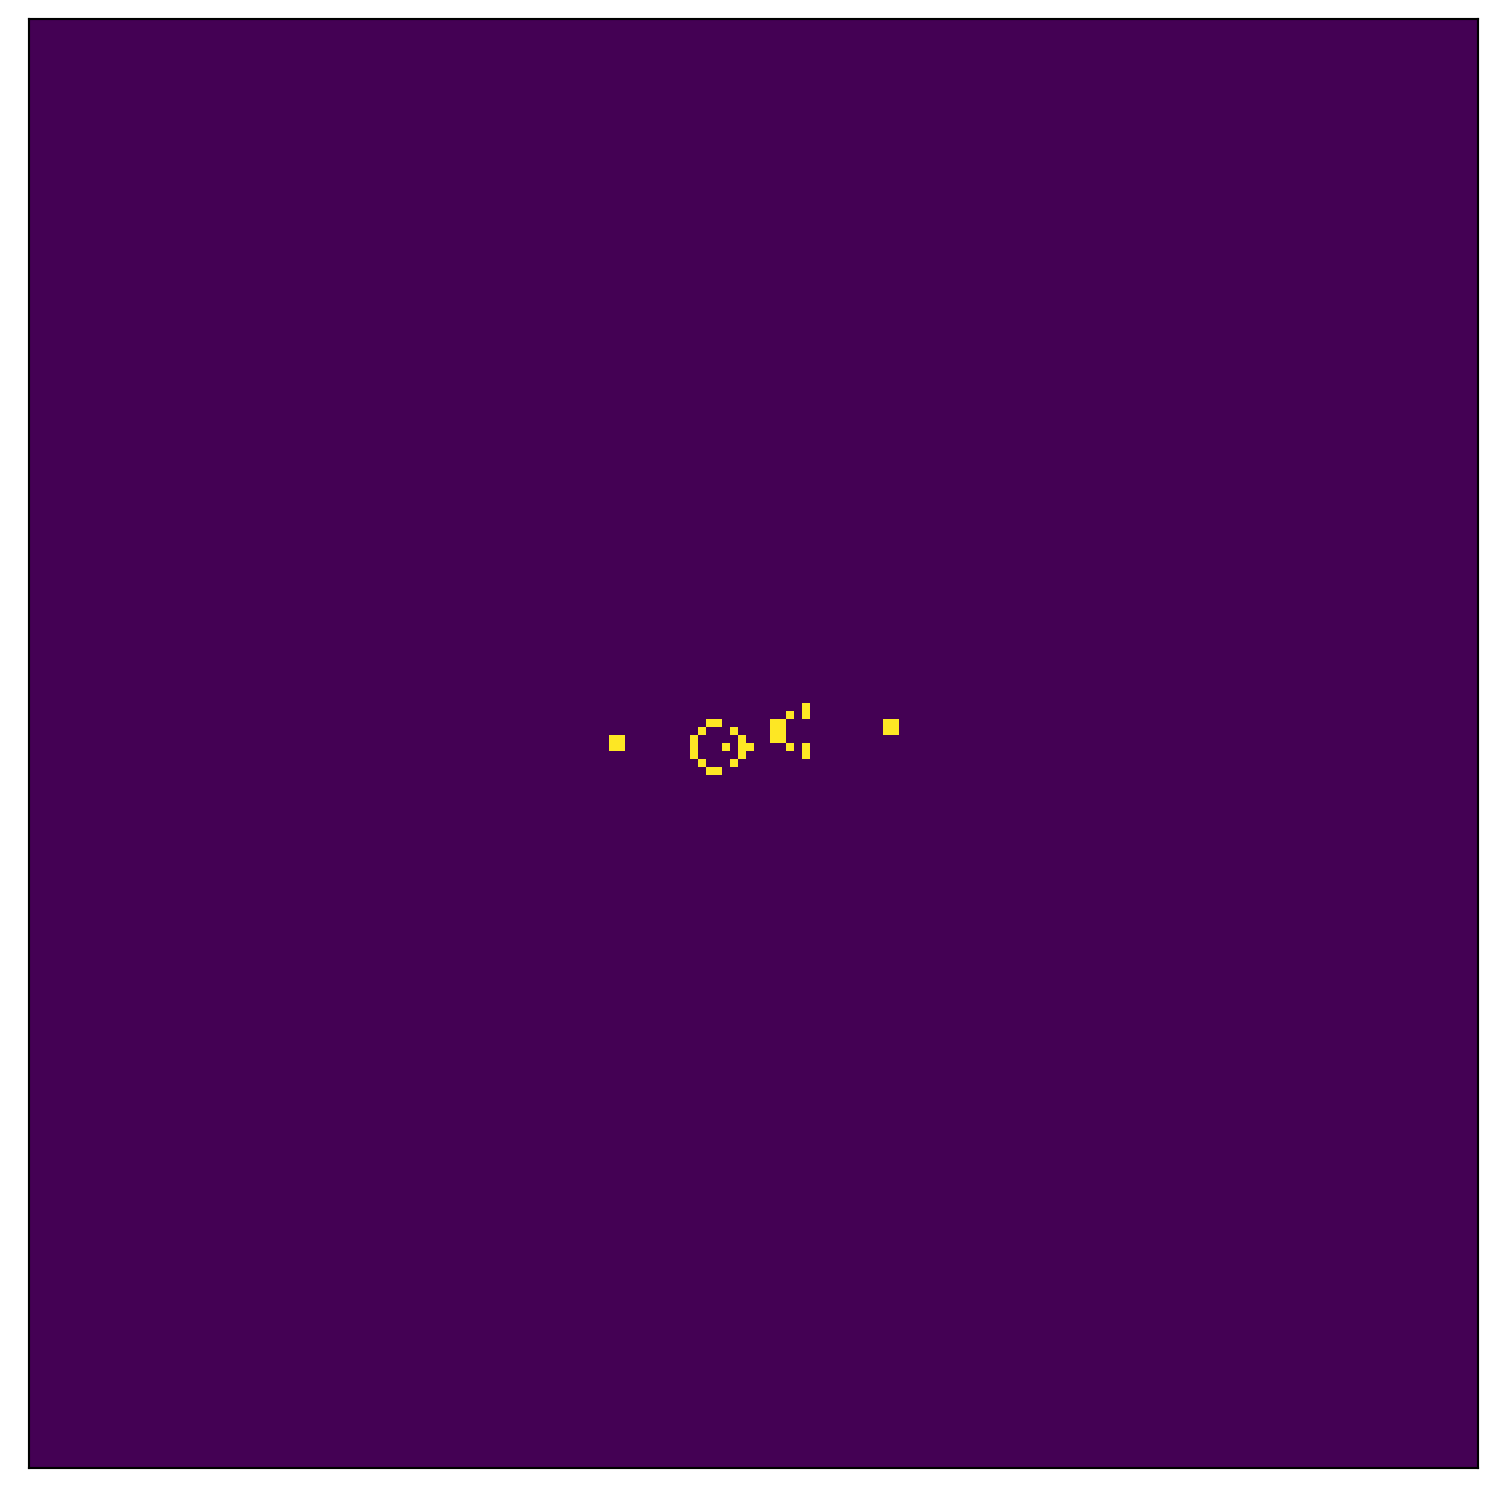

In [38]:
figure_size =10, 10
figure = plt.figure(figsize=figure_size, dpi=192)
plt.xticks([])
plt.yticks([])
population_state = plt.imshow(grid)
current_iteration = plt.text(5, -5, '', c='red');

We embed the code we wrote to compute the next state of the population distribution in a function `evolve()` whose argument is expected to be a nonnegative integer that represents the stage of the evolution, starting with 0, and increasing by 1 at every stage. The methods `set_data()` and `set_text()` are called on `population_state` and `current_iteration`, respectively, so as to modify them:

In [39]:
def evolve(i):
    global grid
    number_of_neighbours = np.zeros(grid.shape)
    number_of_neighbours[1 : -1, 1 : -1] =\
            grid[: -2, : -2] + grid[: -2, 1 : -1] + grid[: -2, 2 :]\
            + grid[1 : -1, : -2] + grid[1 : -1, 2 :]\
            + grid[2 :, : -2]   + grid[2 :, 1 : -1]  + grid[2 :, 2 :]
    grid = np.logical_or(np.logical_and(grid == 1, number_of_neighbours == 2
                                       ), number_of_neighbours == 3
                        ).astype(np.int)
    population_state.set_data(grid)
    current_iteration.set_text(f'Iteration: {str(i)}')
    return population_state, current_iteration

We then define a generator function, `keep_going_or_stop()`, to yield forever all nonnegative integers, 0, 1, 2... but every time checking that no living cell is touching one of `grid`'s boundaries; would that be the case, the generator function returns `None`. Rather than defining a variable, initialising it to 0, and incrementing it by 1, we opt for a more elegant implementation and make use of the `count()` iterable from the `itertools` module. We first illustrate the use of `count()`:

In [42]:
def test_count(start=None):
    if start is None:
        for i in count():
            if i > 3:
                return
            yield i
    else:
        for i in count(start):
            if i > start + 3:
                return
            yield i
next(test_count(10))
list(test_count())
list(test_count(10))

10

[0, 1, 2, 3]

[10, 11, 12, 13]

We implement `keep_going_or_stop()` as described:

In [43]:
def keep_going_or_stop():
    for i in count():
        if any(grid[1, 1 : -1]) or any(grid[-2, 1 : -1])\
           or any(grid[1 : -1, 1]) or any(grid[1 : -1, -2]):
            return
        yield i

To create a movie, we use the `FuncAnimation` class from the `matplotlib.animation` module. To create an object from that class, we need to provide the following arguments:

* The `matplotlib.pyplot.figure` object to display in each frame, here `figure` as previously defined.
* A function that takes one argument $v$. If $v$'s value is not `None` then the function is expected to return a tuple of figure elements, usually modified, so that they can be appropriately redrawn for that frame; if $v$'s value is `None` then no more frame is created and the movie is completed. Here that function is `evolve()`.

We make us of three extra keyword arguments:

* frames, whose default value is `itertools.count`, here set to `keep_going_or_stop`, called for each new frame and whose returned value is passed an argument to `evolve()`.
* `interval`, the time that elapses between the display of two successive frames, set by default to `200` (milliseconds), that we change to the value of `animation_intervals`.
* `save_count`, which because `keep_going_or_stop()` is a generator function, is set by default to `100`; we change that default to the value of `max_nb_of_iterations`.

In [44]:
evolution = animation.FuncAnimation(figure, evolve, frames=keep_going_or_stop,
                                    interval=animation_intervals,
                                    save_count=max_nb_of_iterations
                                   )

Finally, we save `evolution` as an `.mp4` movie:

In [ ]:
evolution.save('gosperglidergun.mp4')

MovieWriter ffmpeg unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


The program `b3_s23_movie.py` has two additional features. First, it avoids overwriting an existing `.mp4` file. Let us write a function that takes a file name as argument and creates a new file with the same name except possibly for its extension which we want to be `.mp4`. In case the file exists, the function adds before the `.mp4` extension `_1`, or `_2`, or `_3`... so that the resulting file does not exist. It is convenient to make use of the `sub()` function from the `re` module:

In [ ]:
re.sub('\..*', '', 'gosperglidergun.rle')
re.sub('\..*', '.mp4', 'gosperglidergun.rle')

To illustrate, we let the `system()` function from the `os` module execute the `touch` command to create an empty file, whose name is provided as command line argument to `touch`. We also take advantage of the `ls` and `rm` Jupyter magic commands to list and remove, respectively, all files whose name starts with `my_rle_file` in the working directory:

In [ ]:
def create_mp4_file(rle_filename):
    filename = re.sub('\..*', '', rle_filename)
    if os.path.isfile(filename + '.mp4'):
        for i in count(1):
            mp4_filename = ''.join((filename, '_', str(i), '.mp4'))
            if not os.path.isfile(mp4_filename):
                break
    else:
        mp4_filename = filename + '.mp4'
    os.system(f'touch {mp4_filename}')
        
os.system('touch my_rle_file.rle')
print('Files whose name starts with "my_rle_file":')
%ls my_rle_file*
for _ in range(3):
    create_mp4_file('my_rle_file.rle')
    print('\nFiles whose name starts with "my_rle_file":')
    %ls my_rle_file*
%rm my_rle_file*
print('\nFiles whose name starts with "my_rle_file":');

The additional feature of `b3_s23_movie.py` is that it is meant to be run from the command line and accept command line arguments. For this purpose, we use the `ArgumentParser` class from the `argparse` module:

In [ ]:
parser = ArgumentParser()

parser

We use `ArgumentParser`'s  `add_argument()`'s method to add command line arguments. We provide as arguments to `add_argument()` the name of the command line argument, which by convention is preceded by two hyphens if it is expected to itself take arguments. The `dest` keyword argument is assigned the name of the Python variable that will store the value of that command line argument. The `required` keyword argument has a default value of `False`. We change it to `True` for only one command line argument:

In [ ]:
parser.add_argument('--rle_filename', dest='rle_filename', required=True)

All other command line arguments are optional and provide default values values. By default, command line arguments are of type `str`, so we use the `type` keyword argument to change it to `int`. The `--figure_size` command line arguments is meant to be followed by 2 arguments, which requires using the `nargs` keyword argument to change the default of 1 to 2:

In [ ]:
parser.add_argument('--figure_size', dest='figure_size', default=(10, 10),
                    nargs=2, type=int
                   )
parser.add_argument('--pattern_size_multiplier',
                    dest='pattern_size_multiplier'
                   )
parser.add_argument('--max_nb_of_iterations', dest='max_nb_of_iterations',
                    default=1_000, type=int
                   )
parser.add_argument('--animation_intervals', dest='animation_intervals',
                    default=20, type=int
                   )

Using the file `gosperglidergun.rle`, `b3_s23_movie.py` can be executed from the command line

* with the minimal number of command line arguments, as: `python3 b3_s23_movie.py --rle_filename gosperglidergun.rle`
* with the maximal number of command line arguments, for instance as: `python3 b3_s23_movie.py --rle_filename gosperglidergun.rle --max_nb_of_iterations 100 --figure_size 2 2 --animation_intervals 50 --pattern_size_multiplier 2`